In [16]:
import pandas as pd
import mlflow
import seaborn as sns
import matplotlib.pyplot as plt

from utils import get_metrics


server_uri = "http://127.0.0.1:5001"
experiment_ids = ["797067914215632370", "295689467493078565"]

df_runs = get_metrics(server_uri, experiment_ids)
df_runs = df_runs.sort_values('start_time', ascending=False).drop_duplicates(['start_time', 'step'], keep='first')

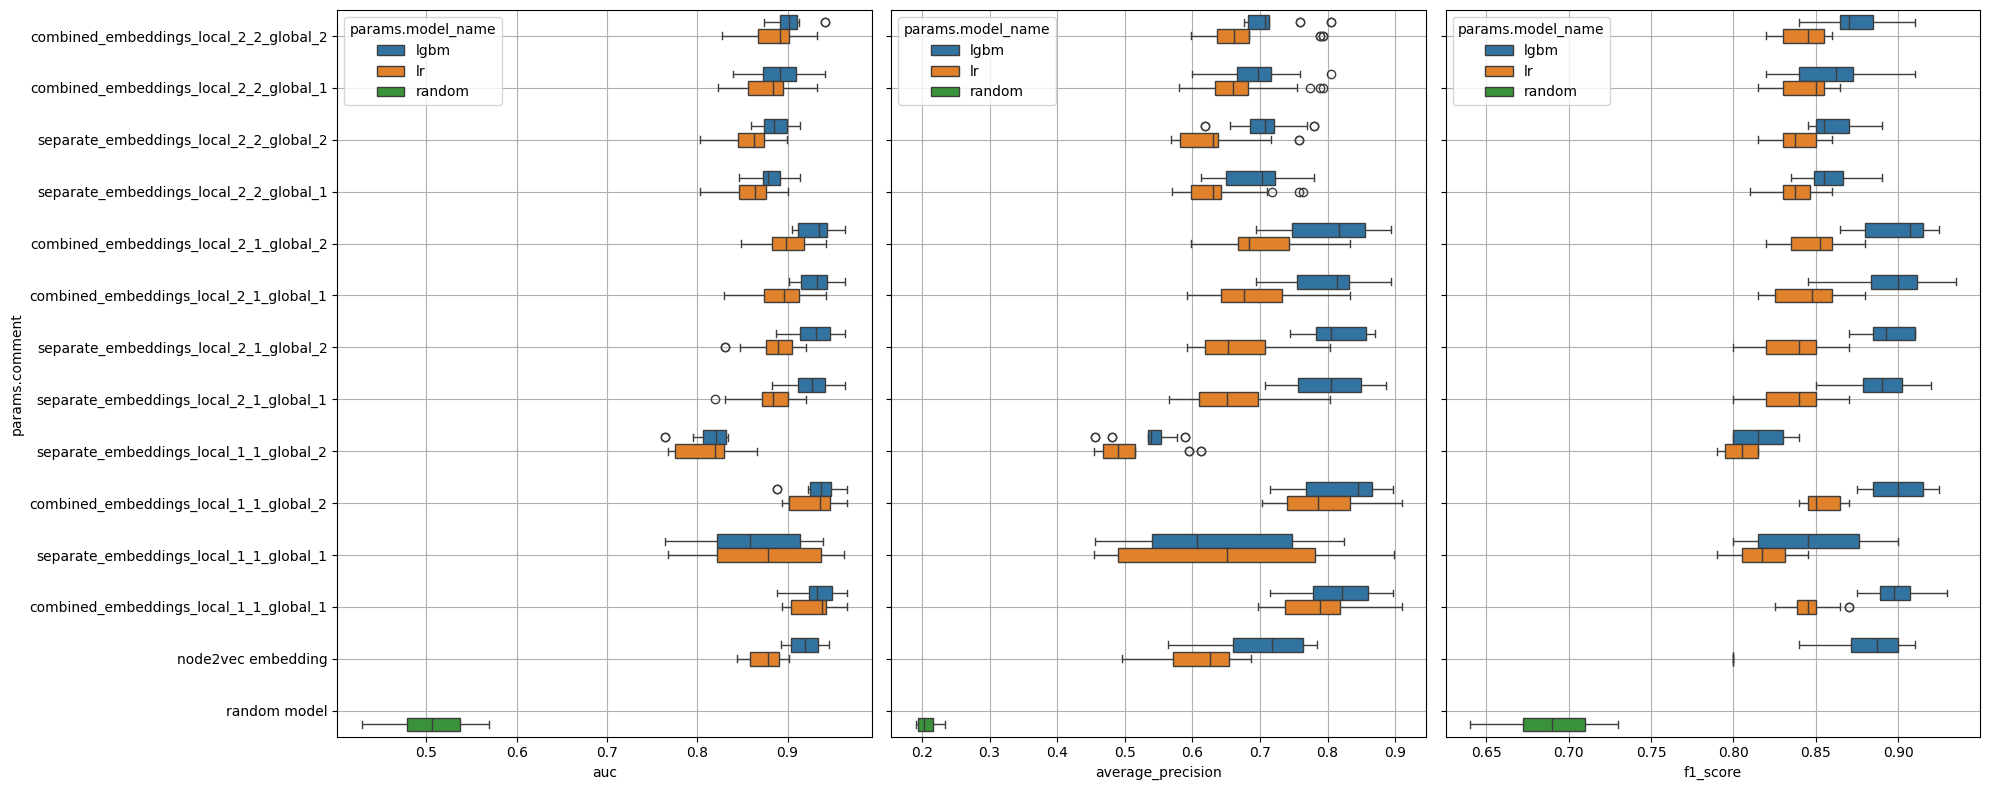

In [17]:
metrics = ['auc', 'average_precision', 'f1_score']

fig, ax = plt.subplots(1, len(metrics), figsize=(20, 8))

for i,(a, metric) in enumerate(zip(ax, metrics)):

    sns.boxplot(y=df_runs["params.comment"], x=df_runs[metric], hue=df_runs["params.model_name"], ax=a)
    if i >0:
        a.set_ylabel('')
        a.set_yticklabels([])
        
    a.grid(True)
fig.tight_layout()